<h1> Contexte </h1>

1) Contexte :
Starbucks est une chaîne de cafés américaine fondée à Seattle. Elle propose à la fois des boissons et de la nourriture.

2) Contenu :
Ce jeu de données contient les informations nutritionnelles des produits alimentaires et des boissons proposés par Starbucks. Toutes les informations nutritionnelles pour les boissons correspondent à une portion de 12 oz (soit environ une canette de soda de 33 centilitres)

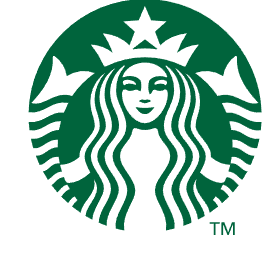

<h1> Import des données </h1>

In [1]:
import numpy as np

donnees = np.genfromtxt('starbucks-menu-nutrition-drinks.csv', delimiter = ',', encoding= 'utf-8-sig', dtype = None)
print(donnees)

[['Drink' 'Calories' 'Fat (g)' ... 'Fiber (g)' 'Protein' 'Sodium']
 ['Cool Lime Starbucks Refreshers Beverage' '45' '0' ... '0' '0' '10']
 ['Ombré Pink Drink' '-' '-' ... '-' '-' '-']
 ...
 ['Ginger Ale' '-' '-' ... '-' '-' '-']
 ['Lemon Ale' '-' '-' ... '-' '-' '-']
 ['Orange Cream Soda' '-' '-' ... '-' '-' '-']]


<h1> Cleaning des données </h1>

<b> Séparation des valeurs textuelles et des valeurs numériques

In [2]:
donnees[donnees == '-'] = np.nan

header = donnees[0, :]

drinks = donnees[1:,0]

data = donnees[1:,1:].astype(float)
print(data)

[[45.  0. 11.  0.  0. 10.]
 [nan nan nan nan nan nan]
 [nan nan nan nan nan nan]
 ...
 [nan nan nan nan nan nan]
 [nan nan nan nan nan nan]
 [nan nan nan nan nan nan]]


<b> Supppression des lignes sans valeur numérique </b>

In [3]:
#identifier les lignes où toutes les valeurs sont np.nan
lignes_sans_donnees = np.isnan(data).all(axis=1)

proportion = 100*sum(lignes_sans_donnees)/data.shape[0]
print(f"{int(proportion)} % des boissons n'ont pas de valeur")

lignes_avec_valeurs = ~np.isnan(data).all(axis=1) #inverse les true et les false

drinks = drinks[lignes_avec_valeurs]
print(drinks.shape)
data = data[lignes_avec_valeurs]
print(data.shape)
print(data)

48 % des boissons n'ont pas de valeur
(92,)
(92, 6)
[[ 45.    0.   11.    0.    0.   10. ]
 [ 80.    0.   18.    1.    0.   10. ]
 [ 60.    0.   14.    1.    0.   10. ]
 [110.    0.   28.    0.    0.    5. ]
 [  0.    0.    0.    0.    0.    0. ]
 [130.    2.5  21.    0.    5.   65. ]
 [140.    2.5  23.    0.    5.   90. ]
 [130.    2.5  21.    0.    5.   65. ]
 [ 80.    0.   19.    0.    0.   10. ]
 [ 60.    0.   15.    0.    0.   10. ]
 [150.    0.   38.    0.    0.   15. ]
 [140.    0.   35.    0.    0.   10. ]
 [140.    0.   35.    0.    0.   15. ]
 [150.    0.   37.    0.    0.   15. ]
 [ 70.    0.   17.    0.    0.   10. ]
 [120.    0.   31.    0.    0.   10. ]
 [140.    0.   35.    0.    0.   10. ]
 [ 60.    0.   15.    0.    0.   10. ]
 [120.    0.   31.    0.    0.   10. ]
 [140.    0.   35.    0.    0.   10. ]
 [150.    0.   38.    0.    0.   15. ]
 [140.    0.   35.    0.    0.   10. ]
 [ 30.    0.    8.    0.    0.    5. ]
 [ 70.    0.   17.    0.    0.    0. ]
 [ 30.    0.

<h1> Analyse des données </h1>

In [4]:
moyenne_cal = np.mean(data[:,0])
print(f"La moyenne des calories est de {int(moyenne_cal)} kcal")

mediane_prot = np.median(data[:,-2])
print(f"La médiane des protéines est de {mediane_prot} protéines")

min_lipides = np.min(data[:,1])
max_lipides = np.max(data[:,1])
print(f"Le minimum des lipides est de {min_lipides} lipides")
print(f"Le maximum des lipides est de {max_lipides} lipides")

max_cal = np.max(data[:,0])
boisson_max_cal = drinks[np.argmax(data[:,0])]
print(f"La boisson avec le plus de calories est {boisson_max_cal} avec {max_cal} calories")

min_cal = np.min(data[:,0])
boisson_min_cal = drinks[np.argmin(data[:,0])]
print(f"La boisson avec le moins de calories est {boisson_min_cal} avec {min_cal} calories")

La moyenne des calories est de 135 kcal
La médiane des protéines est de 1.0 protéines
Le minimum des lipides est de 0.0 lipides
Le maximum des lipides est de 26.0 lipides
La boisson avec le plus de calories est Starbucks Signature Hot Chocolate avec 430.0 calories
La boisson avec le moins de calories est Iced Coffee avec 0.0 calories


<h1> création d'une nouvelle colonne indiquant le niveau de calorie </h1>

In [5]:
calories = data[:,0]

niveaux_calories = np.zeros(calories.shape, dtype=int)

niveaux_calories[(calories >=0) & (calories <=100)] = 1
niveaux_calories[(calories > 100) & (calories <=200)] = 2
niveaux_calories[(calories >200) & (calories <=300)] = 3
niveaux_calories[(calories >300)] = 4

nutriscore_1 = calories[niveaux_calories == 1]
print(nutriscore_1)

print(f"La moyenne de calories pour les boissons nutriscore 1 est de {int(np.mean(nutriscore_1))} calories")

[45. 80. 60.  0. 80. 60. 70. 60. 30. 70. 30. 70. 30. 90. 60. 90. 90. 60.
 50. 10. 60. 70. 60.  5. 10.  5.  5.  5.  5.  0.  5. 70.  5. 45.]
La moyenne de calories pour les boissons nutriscore 1 est de 43 calories
